###  To build a machine learning model that accurately predicts the sale price of residential homes based on various features such as number of bedrooms, bathrooms, square footage, location, and property characteristics

## 

In [ ]:
## Importing necessary libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load data
file_path = "C:\\Users\\Locini\\Downloads\\predict_price.csv"
data = pd.read_csv(file_path)

print("Dataset Shape & Sample")
print("Dataset Shape:", data.shape)
print(data.head())
print("\nData Types:\n", data.dtypes)

Dataset Shape & Sample
Dataset Shape: (21613, 21)
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   



In [3]:
## Drop unnecessary columns 
data = data.drop(columns=['id', 'date', 'zipcode'], errors='ignore')

In [4]:
## Handling missing value
print("\nMissing Values")
print(data.isnull().sum())
data.fillna(data.median(numeric_only=True), inplace=True)


Missing Values
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [5]:
# Remove outlier
def remove_outliers_iqr(df, cols):
    df_cleaned = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

numeric_cols_for_outlier_removal = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
data = remove_outliers_iqr(data, numeric_cols_for_outlier_removal)


Descriptive Statistics After Outlier Removal
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.793000e+04  17930.000000  17930.000000  17930.000000  17930.000000   
mean   4.598386e+05      3.289571      2.005326   1870.387395   7202.641160   
std    1.983602e+05      0.899878      0.687596    673.408210   3520.758941   
min    7.800000e+04      0.000000      0.000000    370.000000    520.000000   
25%    3.060000e+05      3.000000      1.500000   1360.000000   4800.000000   
50%    4.230000e+05      3.000000      2.000000   1790.000000   7134.000000   
75%    5.783750e+05      4.000000      2.500000   2310.000000   9163.000000   
max    1.120000e+06     33.000000      5.750000   4220.000000  19141.000000   

             floors    waterfront          view     condition        grade  \
count  17930.000000  17930.000000  17930.000000  17930.000000  17930.00000   
mean       1.473898      0.001840      0.143558      3.407529      7.43932   
std     

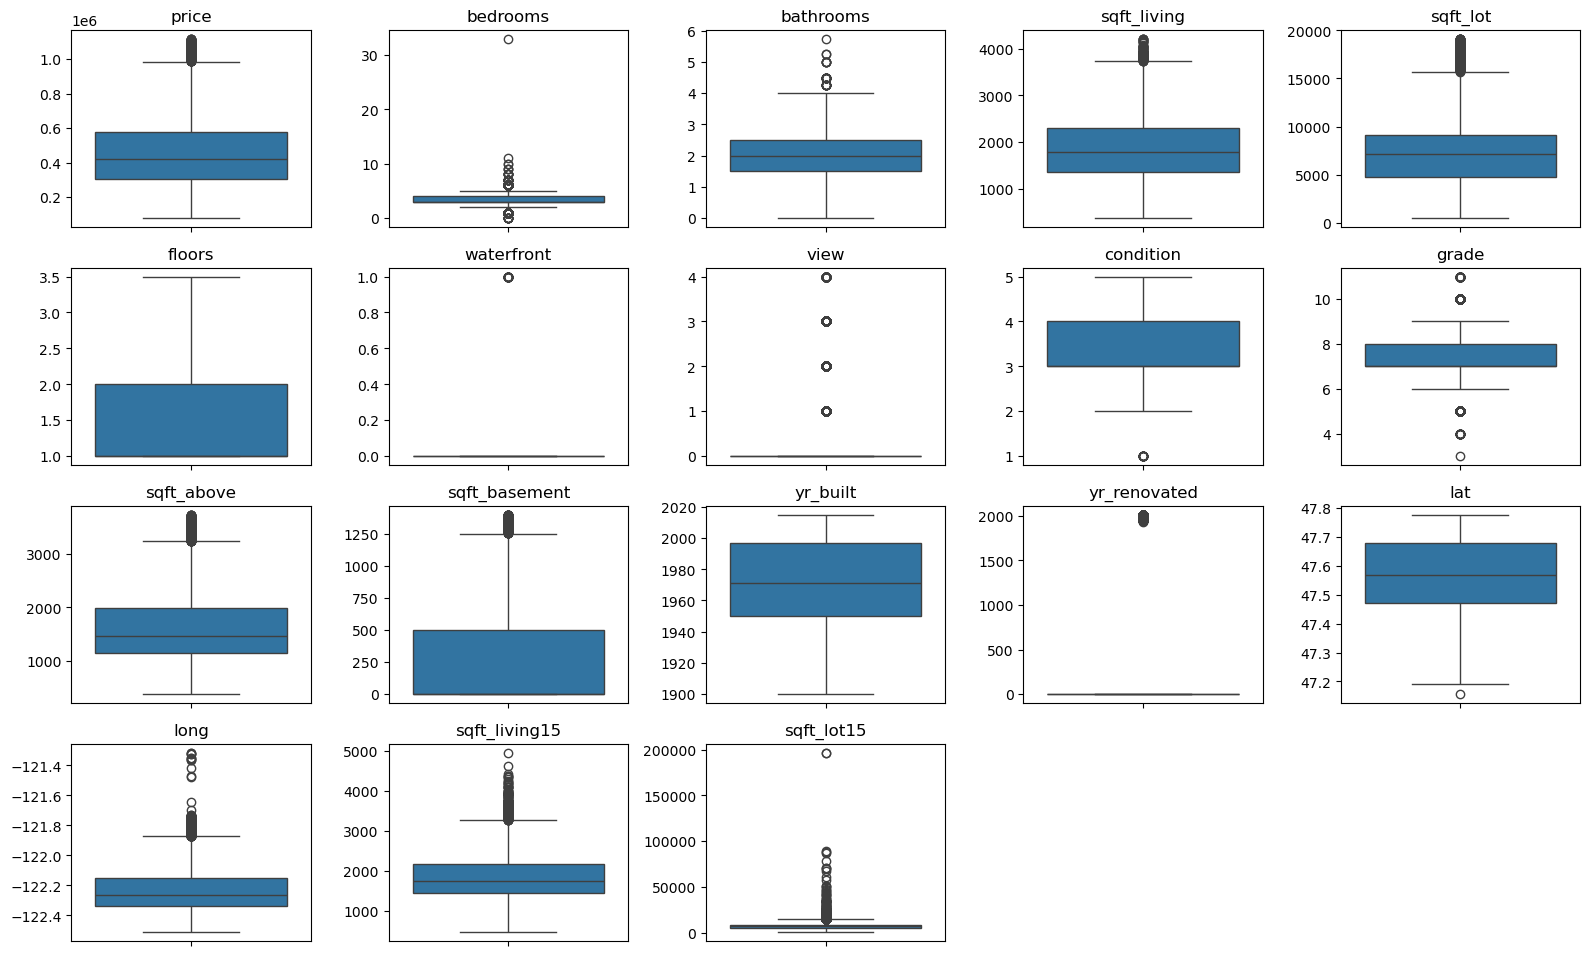

In [6]:
#VISUALIZATION
print("\nDescriptive Statistics After Outlier Removal")
print(data.describe())

# Boxplots
plt.figure(figsize=(16, 12))
numeric_cols = data.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f"{col}")
    plt.ylabel('')
plt.tight_layout()
plt.show()

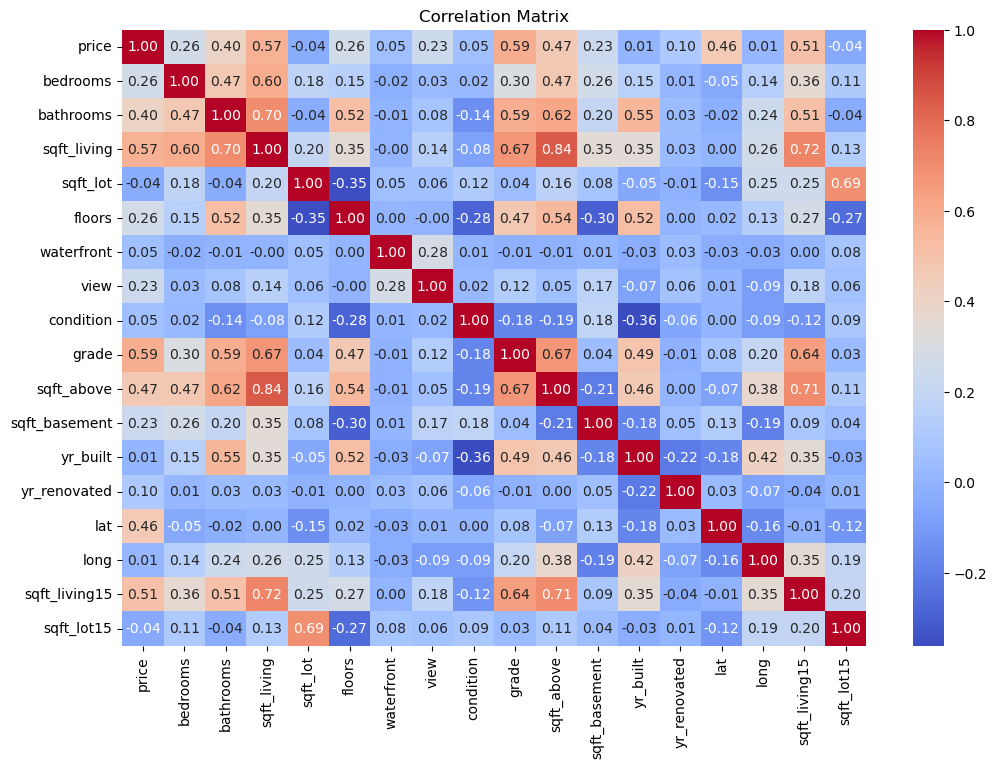

In [7]:
# Correlation Matrix
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

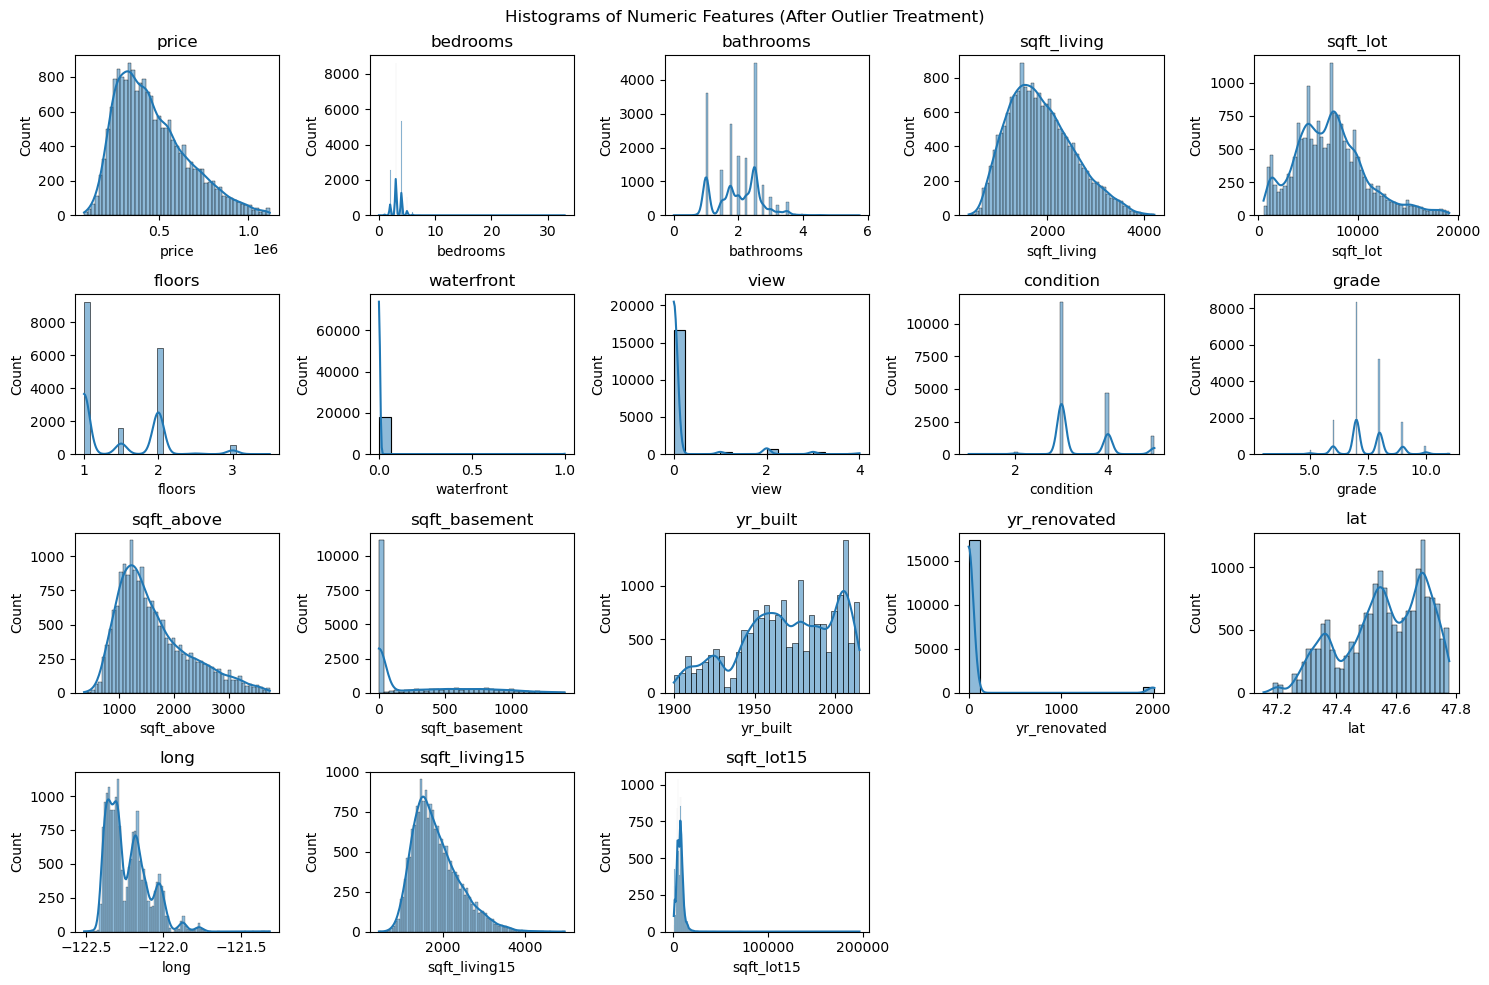

In [8]:
# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.suptitle("Histograms of Numeric Features (After Outlier Treatment)")
plt.tight_layout()
plt.show()